### We will try to train a perceptron model in this example by creating data sets around two classes, scroll down to see the data set.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import Normalizer

import matplotlib.pyplot as plt

In [10]:
mean_cluster_one = [0.5,0.5]
mean_cluster_two = [-0.5,-0.5]

cov = [[0.05,0],[0,0.05]]

# getting random gaussian points from the computed mean and covariance
cluster_one = np.random.multivariate_normal(mean_cluster_one, cov, (100,1))
cluster_two = np.random.multivariate_normal(mean_cluster_two, cov, (100,1))

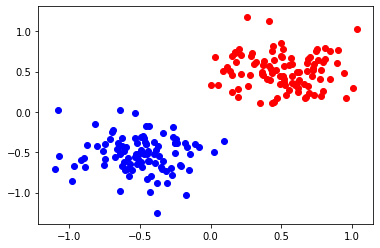

(200, 2)
(200, 1)
(160, 2)
(160, 1)


In [11]:
#showing scatter plot of clusters
x_one, y_one = cluster_one.T
x_two, y_two = cluster_two.T

y_label_one = [1]*100
y_label_two = [-1]*100

plt.scatter(x_one,y_one,c='red')
plt.scatter(x_two, y_two,c='blue')
plt.show()

#preparing data

X=np.concatenate((cluster_one, cluster_two),axis=0).reshape(200,2)
y=np.concatenate((y_label_one, y_label_two),axis=0).reshape(200,1)

# sanity check
print(X.shape)
print(y.shape)

# Dividing into test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

print(X_train.shape)
print(y_train.shape)

In [12]:
class Perceptron:
    def __init__(self, dimensions, alpha, epochs):
        # intialize weights
        self.w = np.zeros((dimensions, 1))
        self.epochs = epochs # Iterations/epochs T
        self.alpha = alpha
        self.preds = np.matmul(X, self.w)

    def model(self, x):
        return [1] if (np.dot(self.w.T, np.reshape(x, newshape=(2,1)))[0][0] >= 0) else [-1]

    def minimumLoss(self, preds, y):
        cost = 0
        for i, pred in enumerate(preds):
            cost = cost + (pred[0] - y[i][0])**2

        if cost == 0:
            return True
        else:
            return False

    def fit(self, X, Y):
        epochForConverge = 0
        for epoch in range(self.epochs):
            predictions = []
            epochForConverge += 1
            # Predictions for every x_i
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                # add to prediction array
                predictions.append(y_pred)
                self.w = self.w + self.alpha * (y[0] - y_pred[0]) * np.reshape(x, newshape=(2,1))
            
            # save the epoch when there is no loss, i.e. all predictions are correct
            if self.minimumLoss(predictions, Y) == True:
                break
          
        return self.w, epochForConverge
        
    # Model prediction    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

### Fitting a model, printing the weights

In [13]:
clf = Perceptron(X_train.shape[1], 1, 100)
weights, epochs = clf.fit(X_train, y_train)
print(weights)
print("No. of  epochs to to converge", epochs)

[[0.4131506]
 [1.3338425]]
No. of  epochs to to converge 2


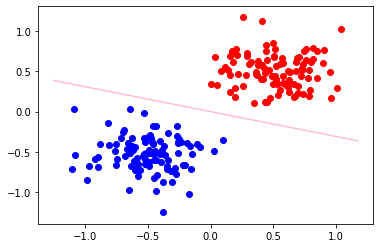

In [14]:
x_values = [np.max(cluster_one), np.min(cluster_two)]
y_values_gd = - (np.dot(weights[0][0], x_values)) / weights[1][0]
plt.plot(x_values, y_values_gd, c='pink')

plt.scatter(x_one,y_one,c='red')
plt.scatter(x_two, y_two,c='blue')
plt.show()

### What if we increase the variance of our data?

In [15]:
mean_cluster_one = [0.5,0.5]
mean_cluster_two = [-0.5,-0.5]

cov_new = [[0.1,0],[0,0.1]]

# getting random gaussian points from the computed mean and covariance
cluster_one_new = np.random.multivariate_normal(mean_cluster_one, cov_new, (100,1))
cluster_two_new = np.random.multivariate_normal(mean_cluster_two, cov_new, (100,1))

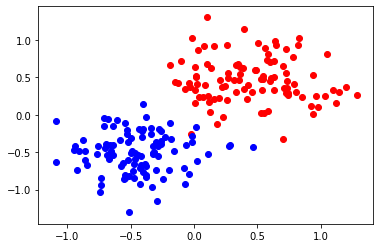

(200, 2)
(200, 1)
(160, 2)
(160, 1)


In [16]:
#showing scatter plot of the new clusters
x_one_new, y_one_new = cluster_one_new.T
x_two_new, y_two_new = cluster_two_new.T

y_label_one_new = [1]*100
y_label_two_new = [-1]*100

plt.scatter(x_one_new, y_one_new,c='red')
plt.scatter(x_two_new, y_two_new,c='blue')
plt.show()

#preparing data

X_new=np.concatenate((cluster_one_new, cluster_two_new),axis=0).reshape(200,2)
y_new=np.concatenate((y_label_one_new, y_label_two_new),axis=0).reshape(200,1)

# sanity check
print(X_new.shape)
print(y_new.shape)

# Dividing into test train split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.20)

print(X_train_new.shape)
print(y_train_new.shape)

### Data is not that easy to separate linearly!!

#### Let's check the iterations it took to converge

In [18]:
clf_new = Perceptron(X_train_new.shape[1], 1, 100)
weights_new, epochs_new = clf_new.fit(X_train_new, y_train_new)
predictions_new = clf_new.predict(X_test_new)

print("No. of  epochs to to converge", epochs_new)

print(weights_new)

No. of  epochs to to converge 100
[[1.45186123]
 [1.1625552 ]]


### All 100 iterations, hmm!!

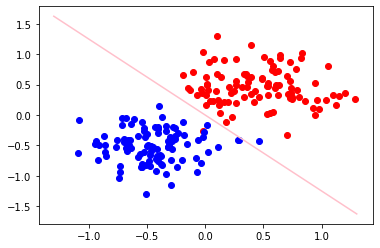

In [19]:
x_values_new = [np.max(cluster_one_new), np.min(cluster_two_new)]
y_values_new = - (np.dot(weights_new[0][0], x_values_new)) / weights_new[1][0]
plt.plot(x_values_new, y_values_new, c='pink')

plt.scatter(x_one_new, y_one_new,c='red')
plt.scatter(x_two_new, y_two_new,c='blue')
plt.show()

### We do have misclassifications.

Conclusion, 

If we don't stop our algorithm perceptron will never converge and it will try to give us the correct line equation by trying 
to separate all data points correctly. Hence we either make use of a combination of perceptrons or make our datasets linearly separable. This way we can use perceptron to resolve this. Interesting right? How would you classify a binary dataset of two variables using their XOR values as prediction labels? Can you use the perceptron?